# Импорт библиотек и подготовка данных

In [1]:
# импорт библиотек 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# импорт датасета
data = pd.read_csv('insurance_data.csv')
data.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,6/1/2020 0:00,TXN00000001,A00003822,PLC00008468,6/23/2015,5/16/2020,5/21/2020,Health,157.13,9000,...,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,6/1/2020 0:00,TXN00000002,A00008149,PLC00009594,4/21/2018,5/13/2020,5/18/2020,Property,141.71,26000,...,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,6/1/2020 0:00,TXN00000003,A00003172,PLC00007969,10/3/2019,5/21/2020,5/26/2020,Property,157.24,13000,...,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,6/1/2020 0:00,TXN00000004,A00007572,PLC00009292,11/29/2016,5/14/2020,5/19/2020,Health,172.87,16000,...,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,6/1/2020 0:00,TXN00000005,A00008173,PLC00000204,12/26/2011,5/17/2020,5/22/2020,Travel,88.53,3000,...,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [3]:
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             1495 non-null   object 
 13  CITY                      9946 non-null   object 
 14  STATE  

In [4]:
# удаление ненужных столбцов 
data = data.drop(['TXN_DATE_TIME'], axis=1)
data = data.drop(['TRANSACTION_ID'], axis=1)
data = data.drop(['CUSTOMER_ID'], axis=1)
data = data.drop(['POLICY_NUMBER'], axis=1)
data = data.drop(['POLICY_EFF_DT'], axis=1)
data = data.drop(['LOSS_DT'], axis=1)
data = data.drop(['REPORT_DT'], axis=1)
data = data.drop(['CUSTOMER_NAME'], axis=1)
data = data.drop(['INCIDENT_STATE'], axis=1)
data = data.drop(['INCIDENT_CITY'], axis=1)
data = data.drop(['AGENT_ID'], axis=1)
data = data.drop(['VENDOR_ID'], axis=1)
data = data.drop(['ADDRESS_LINE1'], axis=1)
data = data.drop(['ADDRESS_LINE2'], axis=1)
data = data.drop(['POSTAL_CODE'], axis=1)
data = data.drop(['ROUTING_NUMBER'], axis=1)
data = data.drop(['SSN'], axis=1)
data = data.drop(['ACCT_NUMBER'], axis=1)
data = data.drop(['CITY'], axis=1)
data = data.drop(['STATE'], axis=1)

In [14]:
data = data.drop(['EMPLOYMENT_STATUS'], axis=1)

In [45]:
# проверяем, все ли удалилось
data.head()

,PREMIUM_AMOUNT,CLAIM_AMOUNT,MARITAL_STATUS,AGE,TENURE,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,CUSTOMER_EDUCATION_LEVEL,...,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY,Health,Life,Mobile,Motor,Property,Travel
0,157.13,9000,0,54,89,3,0,0,0,3,...,Police,0,1,4,1,0,0,0,0,0
1,141.71,26000,1,61,80,4,0,1,1,3,...,Ambulance,1,0,0,0,0,0,0,1,0
2,157.24,13000,1,47,68,6,0,1,1,2,...,Police,0,1,19,0,0,0,0,1,0
3,172.87,16000,0,36,16,7,0,2,1,1,...,Ambulance,0,0,12,1,0,0,0,0,0
4,88.53,3000,0,51,16,2,1,1,2,1,...,Police,0,1,18,0,0,0,0,0,1


In [52]:
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PREMIUM_AMOUNT            10000 non-null  float64
 1   CLAIM_AMOUNT              10000 non-null  int64  
 2   MARITAL_STATUS            10000 non-null  object 
 3   AGE                       10000 non-null  int64  
 4   TENURE                    10000 non-null  int64  
 5   NO_OF_FAMILY_MEMBERS      10000 non-null  int64  
 6   RISK_SEGMENTATION         10000 non-null  object 
 7   HOUSE_TYPE                10000 non-null  object 
 8   SOCIAL_CLASS              10000 non-null  object 
 9   CUSTOMER_EDUCATION_LEVEL  9471 non-null   object 
 10  CLAIM_STATUS              10000 non-null  object 
 11  INCIDENT_SEVERITY         10000 non-null  object 
 12  AUTHORITY_CONTACTED       10000 non-null  object 
 13  ANY_INJURY                10000 non-null  int64  
 14  POLICE_


# Кодируем данные с помощью get dummies и loc

In [6]:
data['INSURANCE_TYPE'].unique()

array(['Health', 'Property', 'Travel', 'Life', 'Motor', 'Mobile'],
      dtype=object)

In [7]:
dumm1 = pd.get_dummies( data['INSURANCE_TYPE'] )
data = pd.concat([data,dumm1], axis =  1 )
data=data.drop(['INSURANCE_TYPE'], axis=1)

In [51]:
data.head()

,PREMIUM_AMOUNT,CLAIM_AMOUNT,MARITAL_STATUS,AGE,TENURE,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,CUSTOMER_EDUCATION_LEVEL,...,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY,Health,Life,Mobile,Motor,Property,Travel
0,157.13,9000,0,54,89,3,0,0,0,3,...,3,0,1,4,1,0,0,0,0,0
1,141.71,26000,1,61,80,4,0,1,1,3,...,2,1,0,0,0,0,0,0,1,0
2,157.24,13000,1,47,68,6,0,1,1,2,...,3,0,1,19,0,0,0,0,1,0
3,172.87,16000,0,36,16,7,0,2,1,1,...,2,0,0,12,1,0,0,0,0,0
4,88.53,3000,0,51,16,2,1,1,2,1,...,3,0,1,18,0,0,0,0,0,1


In [9]:
# семейное положение 
data['MARITAL_STATUS'].unique()

array(['Y', 'N'], dtype=object)

In [10]:
data.loc[data['MARITAL_STATUS'] == 'Y', 'MARITAL_STATUS'] = 0
data.loc[data['MARITAL_STATUS'] == 'N', 'MARITAL_STATUS'] = 1

In [12]:
# срок владения страховкой
data['TENURE'].unique() 

array([ 89,  80,  68,  16,  38,  20,  97, 118, 119,  14,  39,  90,  48,
        19, 106,  69,  51, 101,  49,  81,  60,  95,  28,  85,  32, 117,
       100, 104,  35, 108,  66,  93,  55, 105,  42, 115,  88,  59,  34,
        92, 102,  15,  12,  13,  96,  54,  82,  40,  36,  43,  29, 107,
        75,  21,  47,  94,  71,  64,  44,  77, 114,  72,  84,  27,  11,
        63,  56,  46,  50,  41,  52,  67,  22,  86,   9,  78,  91,  25,
       112,  65,  87,  76,  79,  10, 110,  24, 111,  53,  73,  99,  23,
       109,  83,  31,   8, 103,  30,   6,  17,   7,  26,  37,  18, 113,
        74,  98,  33,  62,  58,  57, 116,  61,  70,  45], dtype=int64)

In [17]:
# количество членов семьи
data['NO_OF_FAMILY_MEMBERS'].unique()

array([3, 4, 6, 7, 2, 5], dtype=int64)

In [18]:
# сегментированные уровни риска проишествия
data['RISK_SEGMENTATION'].unique()

array(['L', 'M', 'H'], dtype=object)

In [19]:
data.loc[data['RISK_SEGMENTATION'] == 'L', 'RISK_SEGMENTATION'] = 0
data.loc[data['RISK_SEGMENTATION'] == 'M', 'RISK_SEGMENTATION'] = 1
data.loc[data['RISK_SEGMENTATION'] == 'H', 'RISK_SEGMENTATION'] = 2

In [22]:
# тип дома
data['HOUSE_TYPE'].unique()

array(['Own', 'Rent', 'Mortgage'], dtype=object)

In [23]:
data.loc[data['HOUSE_TYPE'] == 'Own', 'HOUSE_TYPE'] = 0
data.loc[data['HOUSE_TYPE'] == 'Rent', 'HOUSE_TYPE'] = 1
data.loc[data['HOUSE_TYPE'] == 'Mortgage', 'HOUSE_TYPE'] = 2

In [27]:
# к какому типу слоя общества вы относитесь
data['SOCIAL_CLASS'].unique()

array(['LI', 'MI', 'HI'], dtype=object)

In [31]:
data.loc[data['SOCIAL_CLASS'] == 'LI', 'SOCIAL_CLASS'] = 0
data.loc[data['SOCIAL_CLASS'] == 'MI', 'SOCIAL_CLASS'] = 1
data.loc[data['SOCIAL_CLASS'] == 'HI', 'SOCIAL_CLASS'] = 2

In [57]:
# какое образование
data['CUSTOMER_EDUCATION_LEVEL'].unique()

array([3, 2, 1, 4, 0, 5], dtype=int64)

In [34]:
data.loc[data['CUSTOMER_EDUCATION_LEVEL'] == 'MD', 'CUSTOMER_EDUCATION_LEVEL'] = 0
data.loc[data['CUSTOMER_EDUCATION_LEVEL'] == 'Masters', 'CUSTOMER_EDUCATION_LEVEL'] = 1
data.loc[data['CUSTOMER_EDUCATION_LEVEL'] == 'PhD', 'CUSTOMER_EDUCATION_LEVEL'] = 2
data.loc[data['CUSTOMER_EDUCATION_LEVEL'] == 'Bachelor', 'CUSTOMER_EDUCATION_LEVEL'] = 3
data.loc[data['CUSTOMER_EDUCATION_LEVEL'] == 'College', 'CUSTOMER_EDUCATION_LEVEL'] = 4
data.loc[data['CUSTOMER_EDUCATION_LEVEL'] == 'High School', 'CUSTOMER_EDUCATION_LEVEL'] = 5
data.loc[data['CUSTOMER_EDUCATION_LEVEL'] == '0', 'CUSTOMER_EDUCATION_LEVEL'] = 6


In [56]:
data['CUSTOMER_EDUCATION_LEVEL'] = data['CUSTOMER_EDUCATION_LEVEL'].fillna(0)

In [43]:
data['CLAIM_STATUS'].unique()

array([0, 1], dtype=object)

In [42]:
data.loc[data['CLAIM_STATUS'] == 'A', 'CLAIM_STATUS'] = 0
data.loc[data['CLAIM_STATUS'] == 'D', 'CLAIM_STATUS'] = 1

In [48]:
data['INCIDENT_SEVERITY'].unique()

array([1, 2, 0], dtype=object)

In [47]:
data.loc[data['INCIDENT_SEVERITY'] == 'Minor Loss', 'INCIDENT_SEVERITY'] = 0
data.loc[data['INCIDENT_SEVERITY'] == 'Major Loss', 'INCIDENT_SEVERITY'] = 1
data.loc[data['INCIDENT_SEVERITY'] == 'Total Loss', 'INCIDENT_SEVERITY'] = 2

In [49]:
data['AUTHORITY_CONTACTED'].unique()

array(['Police', 'Ambulance', 'None', 'Other'], dtype=object)

In [50]:
data.loc[data['AUTHORITY_CONTACTED'] == 'None', 'AUTHORITY_CONTACTED'] = 0
data.loc[data['AUTHORITY_CONTACTED'] == 'Other', 'AUTHORITY_CONTACTED'] = 1
data.loc[data['AUTHORITY_CONTACTED'] == 'Ambulance', 'AUTHORITY_CONTACTED'] = 2
data.loc[data['AUTHORITY_CONTACTED'] == 'Police', 'AUTHORITY_CONTACTED'] = 3

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PREMIUM_AMOUNT            10000 non-null  float64
 1   CLAIM_AMOUNT              10000 non-null  int64  
 2   MARITAL_STATUS            10000 non-null  object 
 3   AGE                       10000 non-null  int64  
 4   TENURE                    10000 non-null  int64  
 5   NO_OF_FAMILY_MEMBERS      10000 non-null  int64  
 6   RISK_SEGMENTATION         10000 non-null  object 
 7   HOUSE_TYPE                10000 non-null  object 
 8   SOCIAL_CLASS              10000 non-null  object 
 9   CUSTOMER_EDUCATION_LEVEL  9471 non-null   object 
 10  CLAIM_STATUS              10000 non-null  object 
 11  INCIDENT_SEVERITY         10000 non-null  object 
 12  AUTHORITY_CONTACTED       10000 non-null  object 
 13  ANY_INJURY                10000 non-null  int64  
 14  POLICE_

In [54]:
data['ANY_INJURY'].unique()

array([0, 1], dtype=int64)

In [55]:
data['POLICE_REPORT_AVAILABLE'].unique()

array([1, 0], dtype=int64)

# меняем тип данных с object на float

In [62]:
data['RISK_SEGMENTATION'] = data['RISK_SEGMENTATION'].astype(float)
data['HOUSE_TYPE'] = data['HOUSE_TYPE'].astype(float)
data['SOCIAL_CLASS'] = data['SOCIAL_CLASS'].astype(float)
data['CUSTOMER_EDUCATION_LEVEL'] = data['CUSTOMER_EDUCATION_LEVEL'].astype(float)
data['CLAIM_STATUS'] = data['CLAIM_STATUS'].astype(float)
data['INCIDENT_SEVERITY'] = data['INCIDENT_SEVERITY'].astype(float)
data['AUTHORITY_CONTACTED'] = data['AUTHORITY_CONTACTED'].astype(float)
data['MARITAL_STATUS'] = data['AUTHORITY_CONTACTED'].astype(float)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PREMIUM_AMOUNT            10000 non-null  float64
 1   CLAIM_AMOUNT              10000 non-null  int64  
 2   MARITAL_STATUS            10000 non-null  float64
 3   AGE                       10000 non-null  int64  
 4   TENURE                    10000 non-null  int64  
 5   NO_OF_FAMILY_MEMBERS      10000 non-null  int64  
 6   RISK_SEGMENTATION         10000 non-null  float64
 7   HOUSE_TYPE                10000 non-null  float64
 8   SOCIAL_CLASS              10000 non-null  float64
 9   CUSTOMER_EDUCATION_LEVEL  10000 non-null  float64
 10  CLAIM_STATUS              10000 non-null  float64
 11  INCIDENT_SEVERITY         10000 non-null  float64
 12  AUTHORITY_CONTACTED       10000 non-null  float64
 13  ANY_INJURY                10000 non-null  int64  
 14  POLICE_

# визуализация данных и кореляция 


In [64]:
correlation = data.corr()
correlation

,PREMIUM_AMOUNT,CLAIM_AMOUNT,MARITAL_STATUS,AGE,TENURE,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,CUSTOMER_EDUCATION_LEVEL,...,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY,Health,Life,Mobile,Motor,Property,Travel
PREMIUM_AMOUNT,1.000000,0.109210,0.001176,-0.011634,0.006190,0.000005,-0.009907,-0.015695,-0.017473,-0.019114,...,0.001176,0.002934,-0.005905,0.003341,0.568202,-0.128658,-0.742875,0.148224,0.289991,-0.131354
CLAIM_AMOUNT,0.109210,1.000000,-0.003962,-0.001530,-0.001614,0.002860,0.003704,0.002359,0.003312,0.026164,...,-0.003962,0.011707,0.005282,-0.004010,-0.117930,0.771818,-0.330882,-0.216924,0.164039,-0.276013
MARITAL_STATUS,0.001176,-0.003962,1.000000,0.003548,0.008559,0.026341,0.004471,0.005878,0.001547,0.010084,...,1.000000,-0.006825,-0.008605,0.004196,0.000733,-0.007662,0.004826,-0.014432,0.011822,0.004304
AGE,-0.011634,-0.001530,0.003548,1.000000,-0.004507,-0.001442,-0.004140,-0.007727,-0.012781,-0.009698,...,0.003548,0.013887,-0.000285,0.019089,-0.024022,-0.009657,0.010940,0.006399,-0.004855,0.021456
TENURE,0.006190,-0.001614,0.008559,-0.004507,1.000000,-0.007814,-0.008710,-0.004448,-0.010122,0.013243,...,0.008559,-0.003832,-0.006269,-0.001705,0.005248,-0.005703,-0.006804,-0.009017,-0.002514,0.018618
NO_OF_FAMILY_MEMBERS,0.000005,0.002860,0.026341,-0.001442,-0.007814,1.000000,-0.011090,-0.021005,-0.004849,0.012741,...,0.026341,0.020829,0.002198,0.009265,-0.004269,0.000860,-0.005198,0.002126,0.005549,0.000998
RISK_SEGMENTATION,-0.009907,0.003704,0.004471,-0.004140,-0.008710,-0.011090,1.000000,-0.005144,-0.002732,-0.001591,...,0.004471,0.000418,0.005474,0.009716,-0.005344,0.005493,0.011124,-0.016817,0.016412,-0.011399
HOUSE_TYPE,-0.015695,0.002359,0.005878,-0.007727,-0.004448,-0.021005,-0.005144,1.000000,0.003266,-0.002146,...,0.005878,-0.010406,-0.016139,0.014819,-0.029780,0.009273,0.013632,-0.004557,0.007050,0.004280
SOCIAL_CLASS,-0.017473,0.003312,0.001547,-0.012781,-0.010122,-0.004849,-0.002732,0.003266,1.000000,-0.019544,...,0.001547,-0.004119,-0.002461,0.008889,-0.010394,0.013241,0.017370,0.006487,-0.008891,-0.017692
CUSTOMER_EDUCATION_LEVEL,-0.019114,0.026164,0.010084,-0.009698,0.013243,0.012741,-0.001591,-0.002146,-0.019544,1.000000,...,0.010084,0.012385,0.005742,-0.012272,-0.007773,0.033434,-0.003540,-0.006883,-0.026554,0.011253


<Axes: >

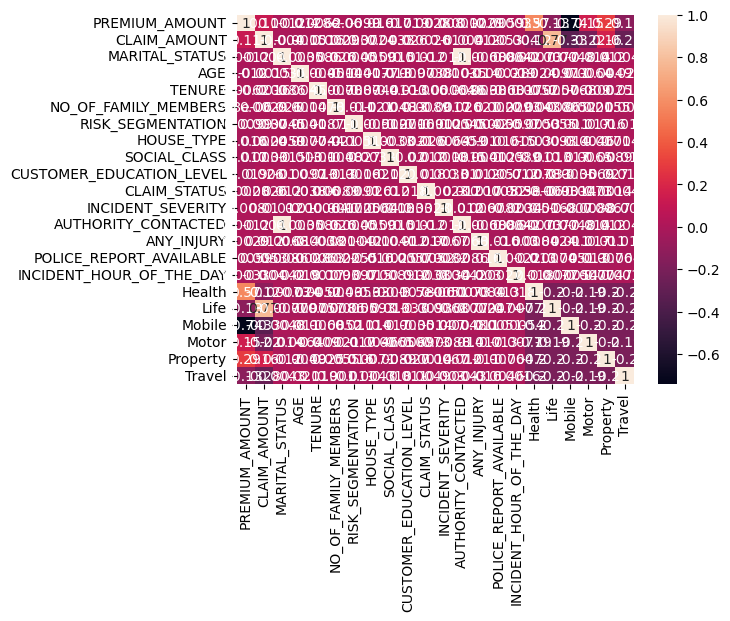

In [65]:
import seaborn as sns
from scipy.stats import norm 
sns.heatmap(data.corr(), annot=True)

 # Обучение модели CatBoostRegressor

In [66]:
X = data.drop(['PREMIUM_AMOUNT'] , axis=1)
y = data['PREMIUM_AMOUNT']

In [67]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [68]:
import catboost
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [69]:
cat = CatBoostRegressor(iterations=100,learning_rate=1,depth=2)
cat.fit(X_train,y_train)

0:	learn: 24.9431487	total: 147ms	remaining: 14.5s
1:	learn: 20.6499423	total: 151ms	remaining: 7.4s
2:	learn: 19.5190651	total: 155ms	remaining: 5s
3:	learn: 19.2411000	total: 158ms	remaining: 3.79s
4:	learn: 19.2100352	total: 161ms	remaining: 3.06s
5:	learn: 19.1713245	total: 165ms	remaining: 2.58s
6:	learn: 19.1586469	total: 168ms	remaining: 2.23s
7:	learn: 19.1438042	total: 171ms	remaining: 1.97s
8:	learn: 19.1276378	total: 174ms	remaining: 1.76s
9:	learn: 19.1189080	total: 177ms	remaining: 1.6s
10:	learn: 19.1050355	total: 181ms	remaining: 1.46s
11:	learn: 19.0946798	total: 183ms	remaining: 1.34s
12:	learn: 19.0804684	total: 187ms	remaining: 1.25s
13:	learn: 19.0688266	total: 190ms	remaining: 1.17s
14:	learn: 19.0573026	total: 193ms	remaining: 1.09s
15:	learn: 19.0481080	total: 196ms	remaining: 1.03s
16:	learn: 19.0309283	total: 199ms	remaining: 970ms
17:	learn: 19.0143362	total: 202ms	remaining: 919ms
18:	learn: 19.0064948	total: 205ms	remaining: 873ms
19:	learn: 18.9948238	total

In [70]:
y_pred = cat.predict(X_test)
y_pred

array([70.47847464,  7.09940842, 79.82018582, ...,  7.79290665,
       70.70786864, 77.47398776])

In [72]:
score = cat.score(X_test, y_test)
score

0.8290012159820049

#  Cross Validation for CatBoostRegressor


In [73]:
from sklearn.model_selection import KFold

In [74]:
# Создаем объект KFold с 5 фолдами
kf = KFold(n_splits=5)

# Выполняем cross validation
scores = []
for train_idx, test_idx in kf.split(X):
    # Обучаем модель на обучающей выборке
    model = CatBoostRegressor()
    model.fit(X.iloc[train_idx], y.iloc[train_idx])

    # Оцениваем модель на тестовой выборке
    score = model.score(X.iloc[test_idx], y.iloc[test_idx])
    scores.append(score)

# Выводим результаты cross validation
print("Средний скор:", np.mean(scores))

Learning rate set to 0.056868
0:	learn: 45.8670735	total: 8.73ms	remaining: 8.72s
1:	learn: 43.7444014	total: 16.1ms	remaining: 8.01s
2:	learn: 41.8783767	total: 22.9ms	remaining: 7.6s
3:	learn: 40.0159701	total: 30ms	remaining: 7.47s
4:	learn: 38.2800233	total: 36.4ms	remaining: 7.24s
5:	learn: 36.6742040	total: 42.6ms	remaining: 7.05s
6:	learn: 35.1816701	total: 48.6ms	remaining: 6.89s
7:	learn: 33.7932480	total: 55ms	remaining: 6.82s
8:	learn: 32.5130437	total: 61.2ms	remaining: 6.74s
9:	learn: 31.3292968	total: 68.8ms	remaining: 6.82s
10:	learn: 30.2359672	total: 76.6ms	remaining: 6.89s
11:	learn: 29.2274457	total: 84.6ms	remaining: 6.97s
12:	learn: 28.4207544	total: 92.2ms	remaining: 7s
13:	learn: 27.5577566	total: 99.8ms	remaining: 7.03s
14:	learn: 26.7654308	total: 107ms	remaining: 7.05s
15:	learn: 26.1135268	total: 115ms	remaining: 7.05s
16:	learn: 25.4418436	total: 123ms	remaining: 7.09s
17:	learn: 24.8752786	total: 133ms	remaining: 7.25s
18:	learn: 24.3127641	total: 139ms	rem

In [75]:
print("Средний скор:", np.mean(scores))

Средний скор: 0.8319810431771757


# Делаем первое предсказание для пяти клиентов

In [76]:
new_candidates = {
                  'CLAIM_AMOUNT': [2000,3500,1100,8000,5000],
                  'MARITAL_STATUS': [2,3,2,1,1],
                  'AGE': [35,40,20,60,55],
                  'TENURE':[50,88,25,66,31],
                  
                  'NO_OF_FAMILY_MEMBERS':[7,7,5,6,1],
                  'RISK_SEGMENTATION':[0,1,2,2,0],
                  'HOUSE_TYPE':[1,2,3,1,2],
                  'SOCIAL_CLASS':[1,2,0,1,2],
                  'CUSTOMER_EDUCATION_LEVEL':[1,2,5,1,4],
                  'CLAIM_STATUS':[1,0,0,1,0],
                  'INCIDENT_SEVERITY':[1,2,0,1,2],
                  'AUTHORITY_CONTACTED':[1,2,0,1,3],
                  'ANY_INJURY':[1,1,0,0,1],
                  'POLICE_REPORT_AVAILABLE':[1,0,0,1,0],
                  'INCIDENT_HOUR_OF_THE_DAY':[22,16,12,13,8],
                  'Health':[1,1,0,1,1],
                  'Life':[1,1,0,0,0],
                  'Mobile':[0,0,1,1,0],
                  'Motor':[1,1,0,1,0],
                  'Property':[0,1,1,1,0],
                  'Travel':[1,1,0,0,1] }

data2 = pd.DataFrame(new_candidates,columns= ['CLAIM_AMOUNT', 'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS', 'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE','SOCIAL_CLASS','CUSTOMER_EDUCATION_LEVEL','CLAIM_STATUS','INCIDENT_SEVERITY','AUTHORITY_CONTACTED','ANY_INJURY','POLICE_REPORT_AVAILABLE','INCIDENT_HOUR_OF_THE_DAY','Health','Life','Mobile','Motor','Property','Travel' ])
y_pred2 = model.predict(data2)

In [77]:
y_pred2

array([ 86.99731466,  99.13634465,  92.11916999,  96.30536979,
       133.68864814])

In [78]:
import tensorflow as tf


# Создание модели нейронной сети
model_tf = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

# Компиляция модели
model_tf.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [79]:
model_tf.fit(X_train, y_train, epochs=100)

Epoch 1/100


250/250 [==============================] - 2s 3ms/step - loss: 2613391.7500 - mae: 565.5990
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 3771.9385 - mae: 50.8761
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 2931.6641 - mae: 44.3447
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 2746.4858 - mae: 42.9561
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 2658.8706 - mae: 42.1084
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 2674.6736 - mae: 42.1988
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 2553.5630 - mae: 41.1414
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 2473.6836 - mae: 40.5635
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 2435.8228 - mae: 40.1830
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 2388.5815 - mae: 3

In [80]:
model_tf.evaluate(X_test, y_test)

63/63 [==============================] - 1s 3ms/step - loss: 528.5040 - mae: 17.4513


[528.5040283203125, 17.451251983642578]

In [81]:
print(f"Accuracy: {model_tf.evaluate(X_test, y_test)[1]:.2f}")

63/63 [==============================] - 0s 2ms/step - loss: 528.5040 - mae: 17.4513
Accuracy: 17.45


In [88]:
import pickle
pickle_out = open("insurance_catboost.pkl","wb")
pickle.dump(cat, pickle_out)
pickle_out.close()